### **Installtion and Imports**

In [2]:
%pip install qiskit qiskit-ibm-runtime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 57.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 61.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 366.8/366.8 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 74.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 10.6 MB/s eta 0:00:00


In [3]:
%pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=7e43dddcc125116029322ae08c9032bf494f0823859124c550c1217c9fb5d840
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc


In [4]:
%pip install qiskit_aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 31.8 MB/s eta 0:00:00


In [5]:
from qiskit.visualization import plot_bloch_vector, plot_bloch_multivector
from qiskit.quantum_info import Statevector
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram


## Representing Qubit on Bloch Sphere using Coordinates and State vector notation

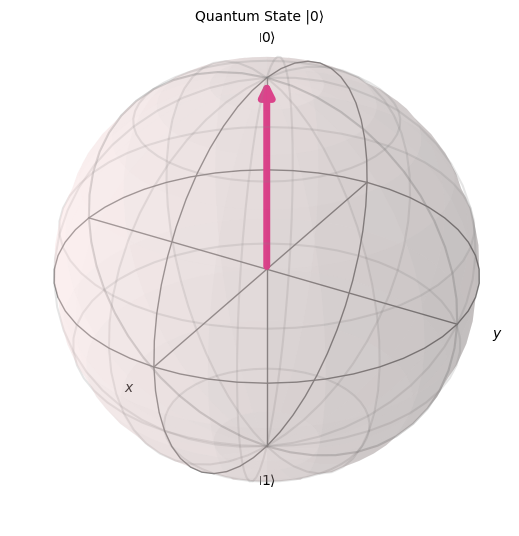

In [6]:
# Plot using Cartesian coordinates (x, y, z)
bloch_vector = [0, 0, 1]  # Represents the quantum state |i⟩ = |0⟩
plot_bloch_vector(bloch_vector, title='Quantum State |0⟩')


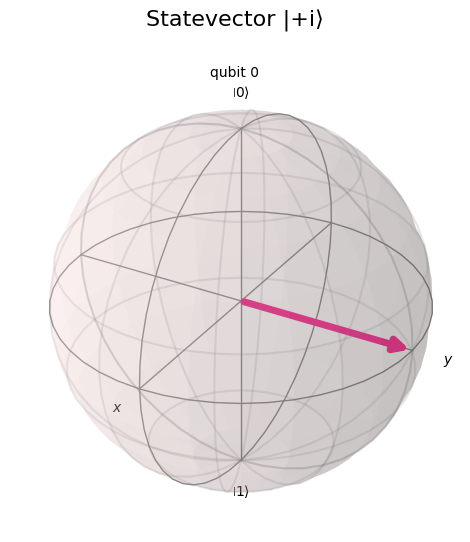

In [7]:
# Plot using a state vector
state = Statevector([1/np.sqrt(2), 1j/np.sqrt(2)])  # State |+i⟩
plot_bloch_multivector(state, title='Statevector |+i⟩')

# **Single Qubit Gates**

### 1.   **X- Gate:**
The **X gate** is equivalent to a classical **NOT gate**, flipping the qubit's state:

$$|0\rangle \;\rightarrow\; |1\rangle$$  

$$|1\rangle \;\rightarrow\; |0\rangle$$

### 2.   Y- **Gate**
The **Y gate** rotates the qubit state by $\pi$ (180 degrees) around the **Y-axis** of the Bloch sphere.

It performs the following transformations:

$$|0\rangle \;\rightarrow\; i|1\rangle$$  

$$|1\rangle \;\rightarrow\; -i|0\rangle$$  

Despite the complex phase factors, when measured, the Y gate flips the computational basis states:

$$|0\rangle \;\rightarrow\; |1\rangle \quad (\text{with probability } 1)$$  

$$|1\rangle \;\rightarrow\; |0\rangle \quad (\text{with probability } 1)$$

### 3.   **Z- Gate**
The **Z gate** is a fundamental quantum gate that performs a **phase flip** operation on a single qubit.  
It leaves the $|0\rangle$ state unchanged and flips the phase of the $|1\rangle$ state.

$$|0\rangle \;\rightarrow\; |0\rangle \quad (\text{unchanged})$$  

$$|1\rangle \;\rightarrow\; -|1\rangle \quad (\text{phase flipped})$$

### 4.   **H- Gate**
The **H gate (Hadamard gate)** is a fundamental single-qubit operation that creates **superposition**, transforming basis states into equal superpositions of $|0\rangle$ and $|1\rangle$.  

$$|0\rangle \;\rightarrow\; \frac{|0\rangle + |1\rangle}{\sqrt{2}} = |+\rangle$$  

$$|1\rangle \;\rightarrow\; \frac{|0\rangle - |1\rangle}{\sqrt{2}} = |-\rangle$$

### 5.   **S- Gate**
The **S gate** is a single-qubit **phase gate** that applies a $\pi/2$ phase shift (90 degrees) to the quantum state.  
It is also known as the **square root of the Z gate**, since applying it twice gives the Z gate.  

$$|0\rangle \;\rightarrow\; |0\rangle \quad (\text{unchanged})$$  

$$|1\rangle \;\rightarrow\; i|1\rangle \quad (\text{phase shifted by 90 degrees})$$

### 6.   **T- Gate**
The **T gate** is a single-qubit **phase gate** that applies a $\pi/4$ phase shift (45 degrees) to the quantum state.  
It is also known as the **$\pi/8$ gate**, and it is the **square root of the S gate**.  

$$|0\rangle \;\rightarrow\; |0\rangle \quad (\text{unchanged})$$  

$$|1\rangle \;\rightarrow\; e^{i\pi/4}|1\rangle \quad (\text{phase shifted by 45 degrees})$$

# **X-Gate**

In [8]:
# Create a quantum circuit with 1 qubit and 1 classical bit
qcX = QuantumCircuit(1, 1)

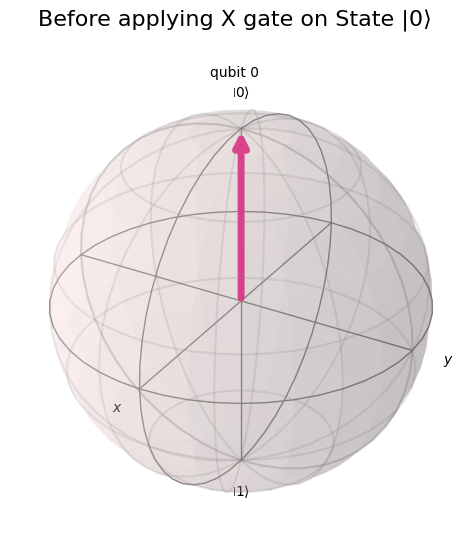

In [9]:
# Get the statevector before X gate
state = Statevector(qcX)
plot_bloch_multivector(state)
plot_bloch_multivector(state, title="Before applying X gate on State |0⟩")

In [10]:
# Apply X gate (Pauli-X gate) to qubit 0
qcX.x(0)

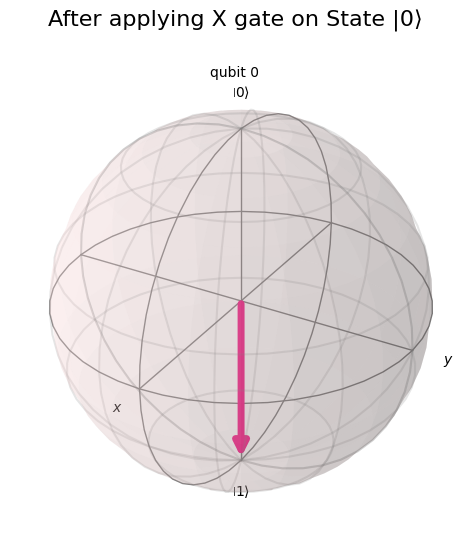

In [11]:
# Get the statevector after X gate (without measurement)
state = Statevector(qcX)
plot_bloch_multivector(state)
plot_bloch_multivector(state, title="After applying X gate on State |0⟩")

Measurement results: {'1': 1000}


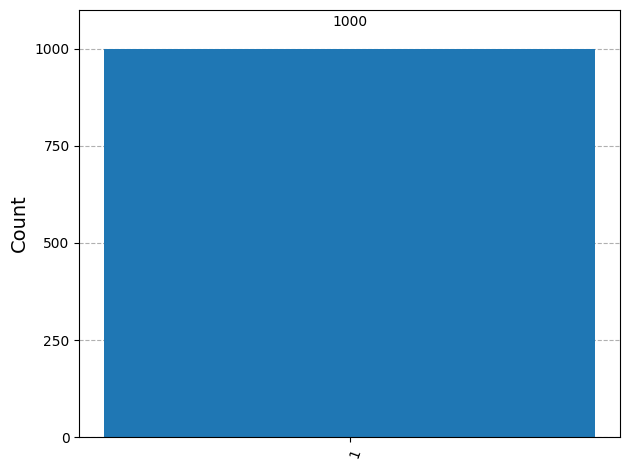

In [12]:
# Measure the qubit
qcX.measure(0, 0)

# Simulate the circuit
simulator = AerSimulator()
compiled_circuit = transpile(qcX, simulator)
job = simulator.run(compiled_circuit, shots=1000)

# Get results
result = job.result()
counts = result.get_counts(qcX)

# Print and visualize results
print("Measurement results:", counts)
plot_histogram(counts)

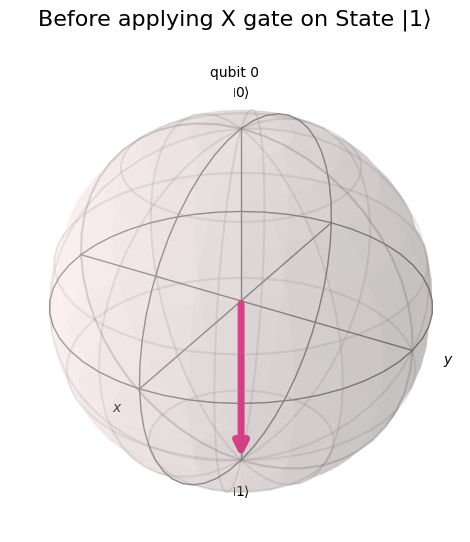

In [13]:
# X gate on |1⟩ state
qcX1 = QuantumCircuit(1)
qcX1.x(0)  # First put qubit in |1⟩ state
state1 = Statevector(qcX1)
plot_bloch_multivector(state1, title="Before applying X gate on State |1⟩")

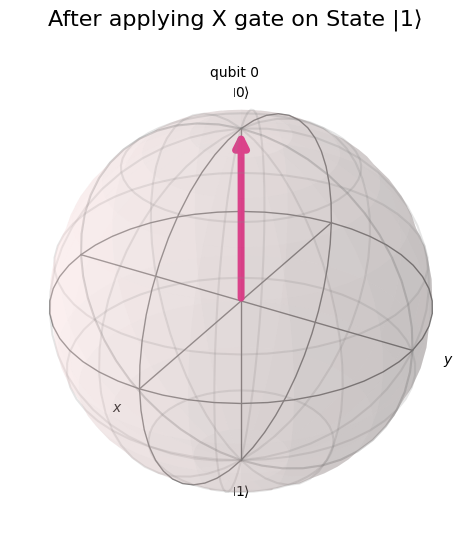

In [14]:
qcX1.x(0)  # Then apply X gate
state1 = Statevector(qcX1)
plot_bloch_multivector(state1, title="After applying X gate on State |1⟩")

# **Y-Gate**

In [15]:
# Create a quantum circuit with 1 qubit and 1 classical bit
qcY = QuantumCircuit(1, 1)

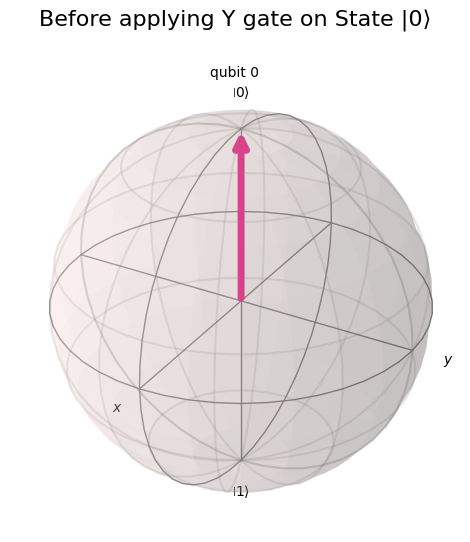

In [16]:
# Get the statevector before Y gate
state = Statevector(qcY)
plot_bloch_multivector(state)
plot_bloch_multivector(state, title="Before applying Y gate on State |0⟩")

In [17]:
# Apply Y gate (Pauli-Y gate) to qubit 0
qcY.y(0)

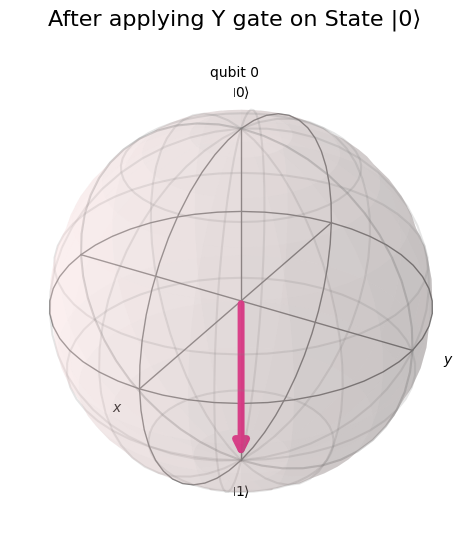

In [18]:
# Get the statevector after Y gate (without measurement)
state = Statevector(qcY)
plot_bloch_multivector(state)
plot_bloch_multivector(state, title="After applying Y gate on State |0⟩")

Measurement results: {'1': 1000}


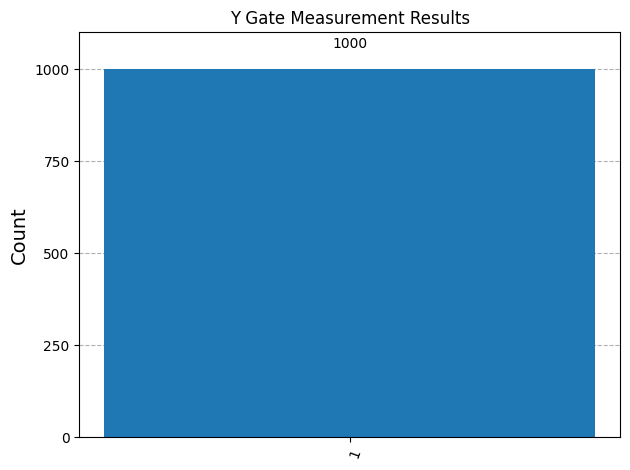

In [19]:
# Measure the qubit
qcY.measure(0, 0)

# Simulate the circuit
simulator = AerSimulator()
compiled_circuit = transpile(qcY, simulator)
job = simulator.run(compiled_circuit, shots=1000)

# Get results
result = job.result()
counts = result.get_counts(qcY)

# Print and visualize results
print("Measurement results:", counts)
plot_histogram(counts, title="Y Gate Measurement Results")


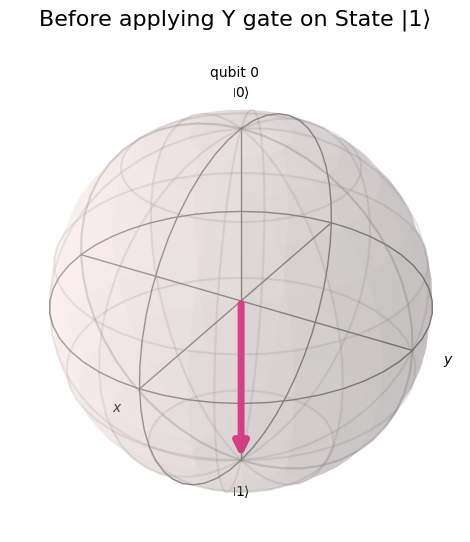

In [20]:
# Y gate on |1⟩ state
qcY1 = QuantumCircuit(1)
qcY1.x(0)  # First put qubit in |1⟩ state
state1 = Statevector(qcY1)
plot_bloch_multivector(state1, title="Before applying Y gate on State |1⟩")

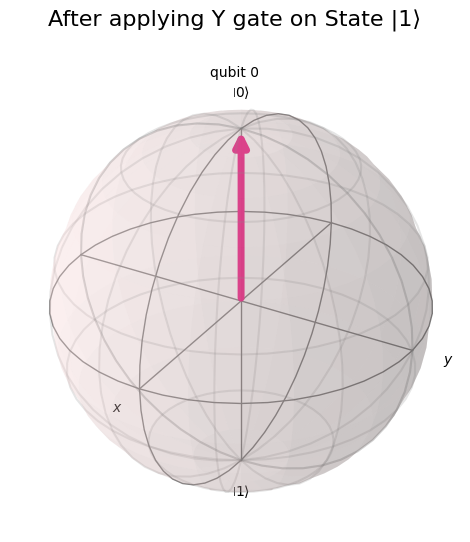

In [21]:
qcY1.y(0) # then apply Y gate
state1 = Statevector(qcY1)
plot_bloch_multivector(state1, title="After applying Y gate on State |1⟩")

# **Z-Gate**

In [22]:
# Create a quantum circuit with 1 qubit and 1 classical bit
qcZ = QuantumCircuit(1, 1)

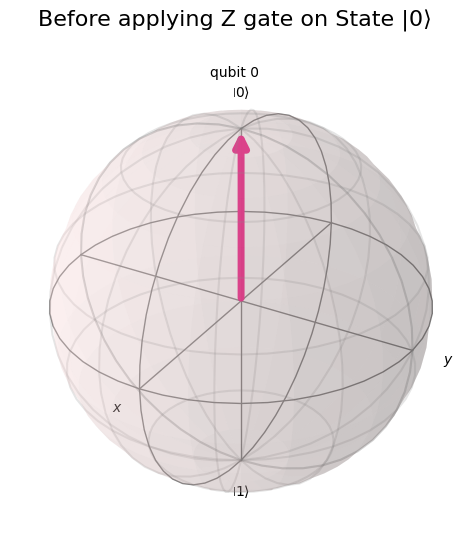

In [23]:
# Get the statevector before Z gate
state = Statevector(qcZ)
plot_bloch_multivector(state)
plot_bloch_multivector(state, title="Before applying Z gate on State |0⟩")

In [24]:
# Apply Z gate (Pauli-Z gate) to qubit 0
qcZ.z(0)

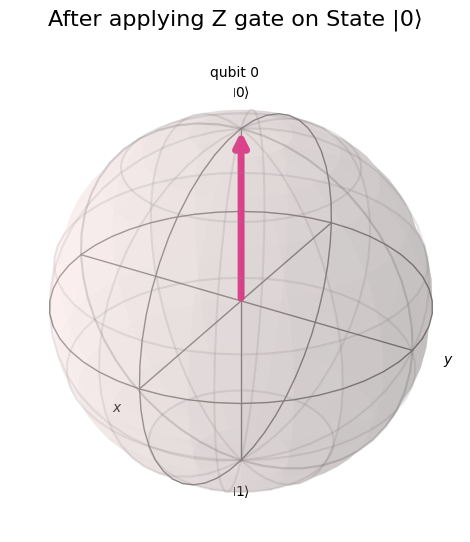

In [25]:
# Get the statevector after Z gate (without measurement)
state = Statevector(qcZ)
plot_bloch_multivector(state)
plot_bloch_multivector(state, title="After applying Z gate on State |0⟩")

Measurement results: {'0': 1000}


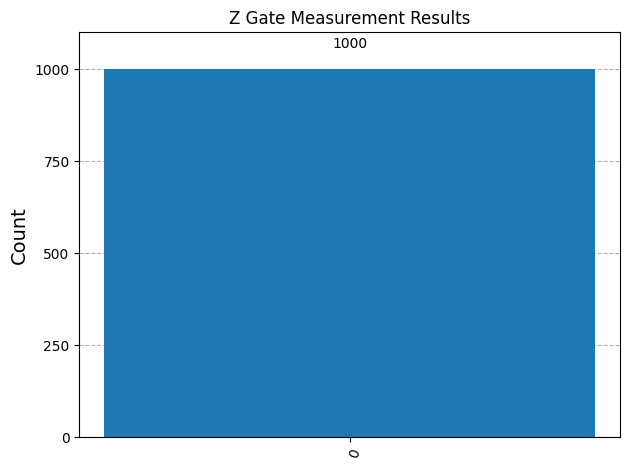

In [26]:
# Measure the qubit
qcZ.measure(0, 0)

# Simulate the circuit
simulator = AerSimulator()
compiled_circuit = transpile(qcZ, simulator)
job = simulator.run(compiled_circuit, shots=1000)

# Get results
result = job.result()
counts = result.get_counts(qcZ)

# Print and visualize results
print("Measurement results:", counts)
plot_histogram(counts, title="Z Gate Measurement Results")


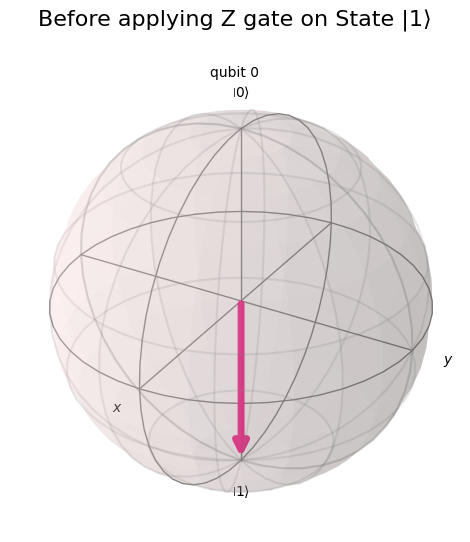

In [27]:
# Z gate on |1⟩ state
qcZ1 = QuantumCircuit(1)
qcZ1.x(0)  # First put qubit in |1⟩ state
state1 = Statevector(qcZ1)
plot_bloch_multivector(state1, title="Before applying Z gate on State |1⟩")

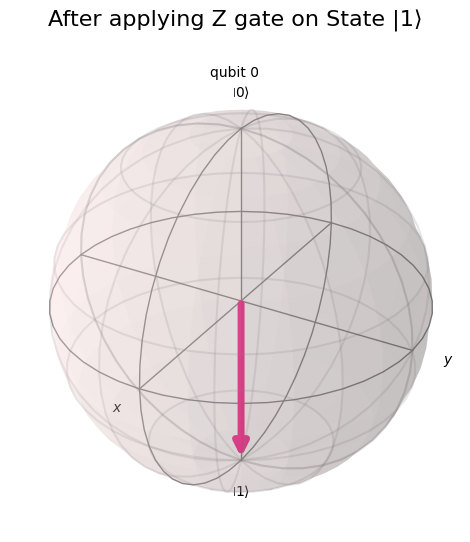

In [28]:
qcZ1.z(0) # then apply Z gate
state1 = Statevector(qcZ1)
plot_bloch_multivector(state1, title="After applying Z gate on State |1⟩")

# **S-Gate**

In [29]:
# Create a quantum circuit with 1 qubit and 1 classical bit
qcS = QuantumCircuit(1, 1)

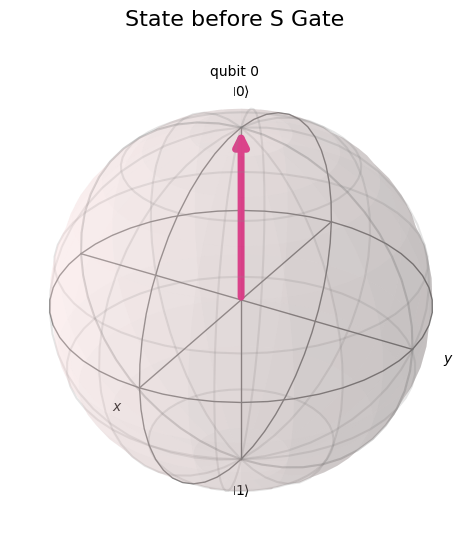

In [30]:
# Get the statevector before S gate
state = Statevector(qcS)
plot_bloch_multivector(state)
plot_bloch_multivector(state, title="State before S Gate")

In [31]:
# Apply S gate (Pauli-S gate) to qubit 0
qcS.s(0)

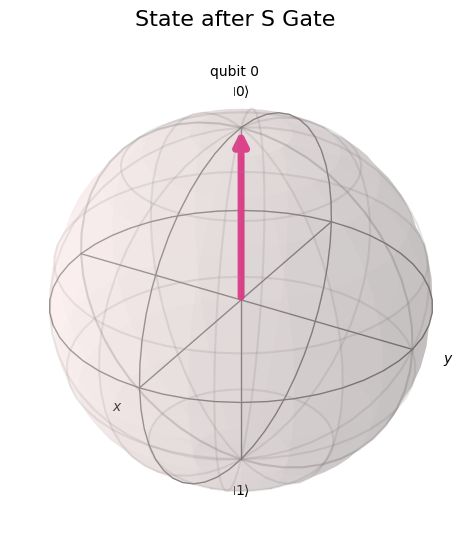

In [32]:
# Get the statevector after S gate (without measurement)
state = Statevector(qcS)
plot_bloch_multivector(state)
plot_bloch_multivector(state, title="State after S Gate")

Measurement results: {'0': 1000}


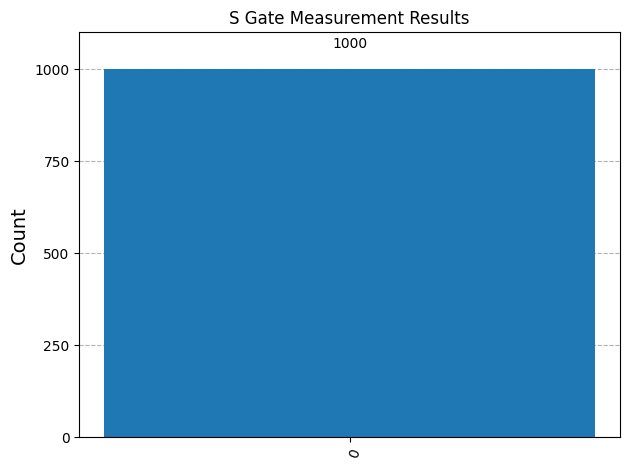

In [33]:
# Measure the qubit
qcS.measure(0, 0)

# Simulate the circuit
simulator = AerSimulator()
compiled_circuit = transpile(qcS, simulator)
job = simulator.run(compiled_circuit, shots=1000)

# Get results
result = job.result()
counts = result.get_counts(qcS)

# Print and visualize results
print("Measurement results:", counts)
plot_histogram(counts, title="S Gate Measurement Results")

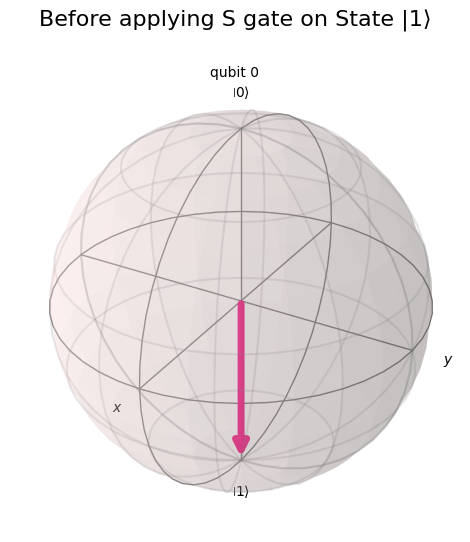

In [34]:
# S gate on |1⟩ state
qcS1 = QuantumCircuit(1)
qcS1.x(0)  # First put qubit in |1⟩ state
state1 = Statevector(qcS1)
plot_bloch_multivector(state1, title="Before applying S gate on State |1⟩")

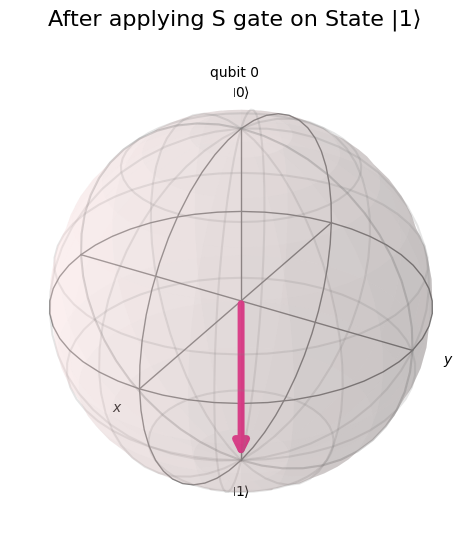

In [35]:
qcS1.s(0) # then apply S gate
state1 = Statevector(qcS1)
plot_bloch_multivector(state1, title="After applying S gate on State |1⟩")

# **T-Gate**

In [36]:
# Create a quantum circuit with 1 qubit and 1 classical bit
qcT = QuantumCircuit(1, 1)

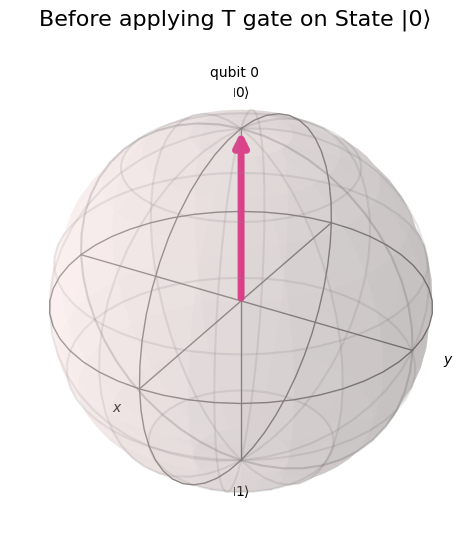

In [37]:
# Visualize the state on the Bloch sphere
qc_bloch = QuantumCircuit(1)
state = Statevector(qc_bloch)
plot_bloch_multivector(state, title="Before applying T gate on State |0⟩")

In [38]:
# Apply T gate (π/8 gate) to qubit 0
qcT.t(0)

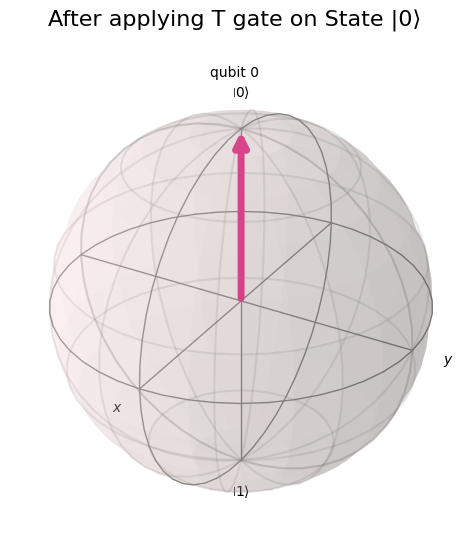

In [39]:
# Visualize the state on the Bloch sphere (without measurement)
qc_bloch = QuantumCircuit(1)
state = Statevector(qc_bloch)
plot_bloch_multivector(state, title="After applying T gate on State |0⟩")

Measurement results: {'0': 1000}


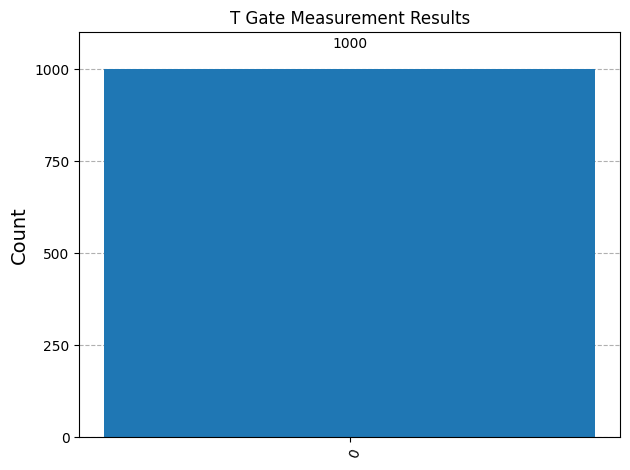

In [40]:
# Measure the qubit
qcT.measure(0, 0)

# Simulate the circuit
simulator = AerSimulator()
compiled_circuit = transpile(qcT, simulator)
job = simulator.run(compiled_circuit, shots=1000)

# Get results
result = job.result()
counts = result.get_counts(qcT)

# Print and visualize results
print("Measurement results:", counts)
plot_histogram(counts, title="T Gate Measurement Results")


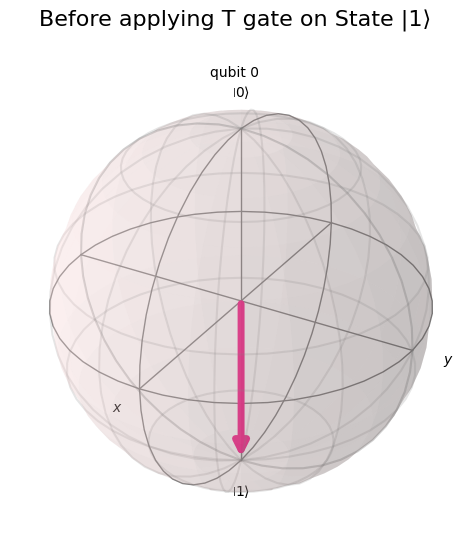

In [41]:
# T gate on |1⟩ state
qcT1 = QuantumCircuit(1)
qcT1.x(0)  # First put qubit in |1⟩ state
state1 = Statevector(qcT1)
plot_bloch_multivector(state1, title="Before applying T gate on State |1⟩")

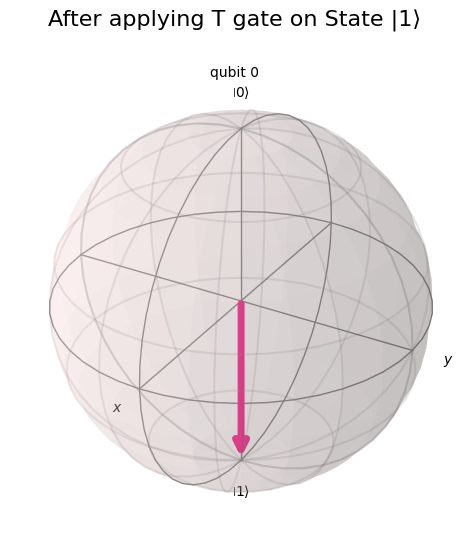

In [42]:
qcT1.t(0) # then apply T gate
state1 = Statevector(qcT1)
plot_bloch_multivector(state1, title="After applying T gate on State |1⟩")

# **H-Gate**

In [43]:
# Create a quantum circuit with 1 qubit and 1 classical bit
qcH = QuantumCircuit(1, 1)

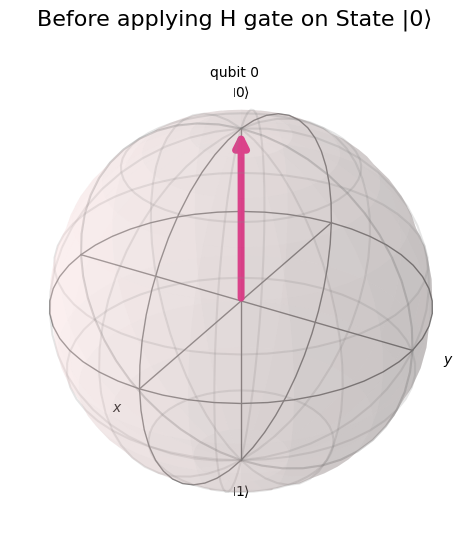

In [44]:
# Visualize the state on the Bloch sphere
qc_bloch = QuantumCircuit(1)
state = Statevector(qc_bloch)
plot_bloch_multivector(state, title="Before applying H gate on State |0⟩")

In [45]:
# Apply H gate (Hadamard gate) to qubit 0
qcH.h(0)

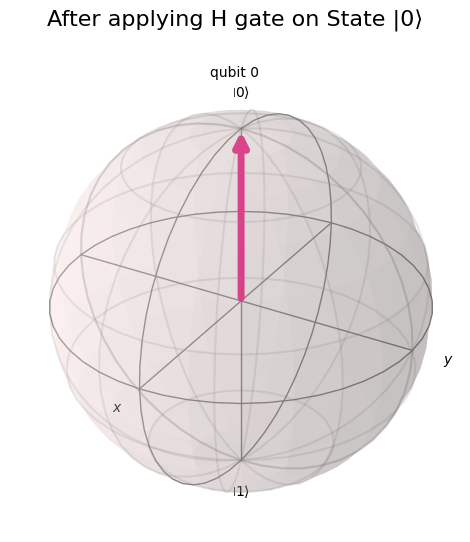

In [46]:
# Visualize the state on the Bloch sphere (without measurement)
qc_bloch = QuantumCircuit(1)
state = Statevector(qc_bloch)
plot_bloch_multivector(state, title="After applying H gate on State |0⟩")

Measurement results: {'1': 515, '0': 485}


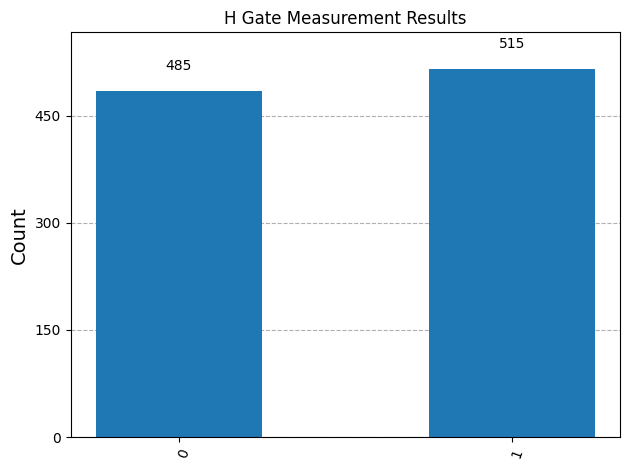

In [47]:
# Measure the qubit
qcH.measure(0, 0)

# Simulate the circuit
simulator = AerSimulator()
compiled_circuit = transpile(qcH, simulator)
job = simulator.run(compiled_circuit, shots=1000)

# Get results
result = job.result()
counts = result.get_counts(qcH)

# Print and visualize results
print("Measurement results:", counts)
plot_histogram(counts, title="H Gate Measurement Results")


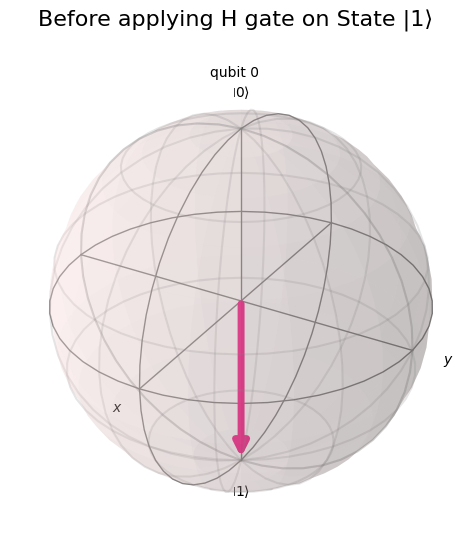

In [48]:
# H gate on |1⟩ state
qcH1 = QuantumCircuit(1)
qcH1.x(0)  # First put qubit in |1⟩ state
state1 = Statevector(qcH1)
plot_bloch_multivector(state1, title="Before applying H gate on State |1⟩")

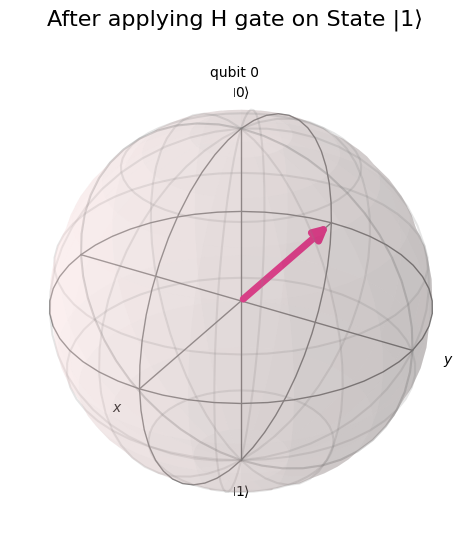

In [49]:
qcH1.h(0) # then apply H gate
state1 = Statevector(qcH1)
plot_bloch_multivector(state1, title="After applying H gate on State |1⟩")

# **Quanum Circuits**

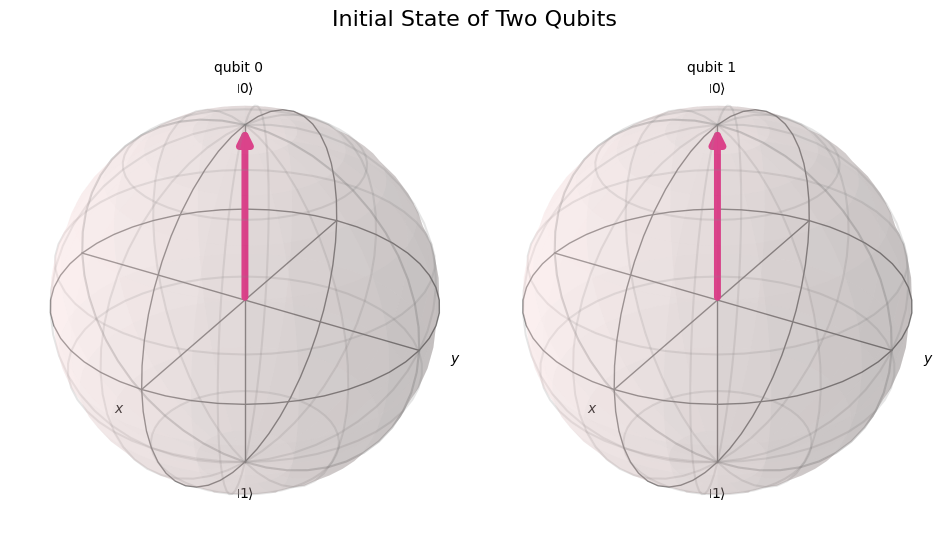

In [50]:
# Create a quantum circuit with 2 qubits
qc_cnot = QuantumCircuit(2)

# Visualize the initial state of the two qubits
initial_state = Statevector(qc_cnot)
plot_bloch_multivector(initial_state, title="Initial State of Two Qubits")

In [55]:
# Apply a Hadamard gate to the first qubit to put it in superposition
qc_cnot.h(0)

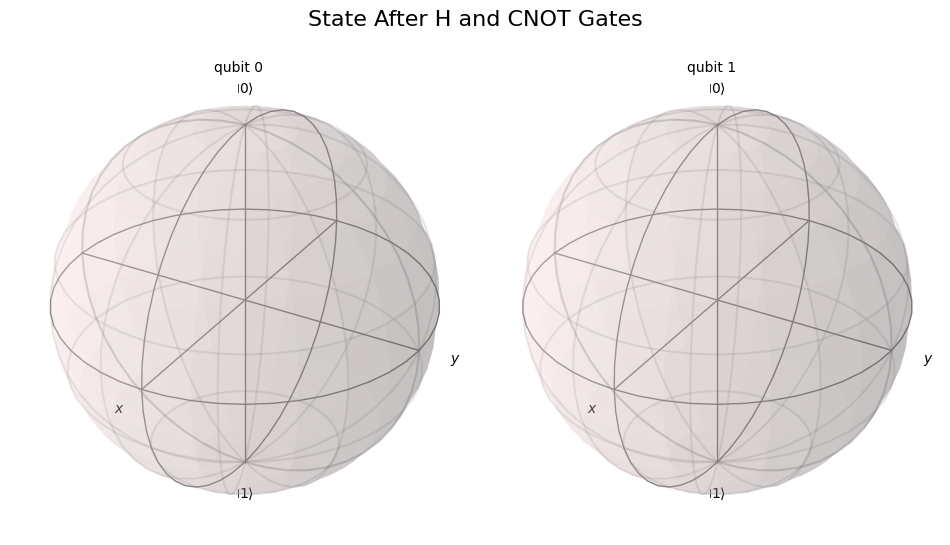

In [54]:
# Visualize the state of the two qubits after applying H and CNOT gates
final_state = Statevector(qc_cnot)
plot_bloch_multivector(final_state, title="State After H and CNOT Gates")

In [56]:
# Apply a CNOT gate with qubit 0 as control and qubit 1 as target
qc_cnot.cx(0, 1)

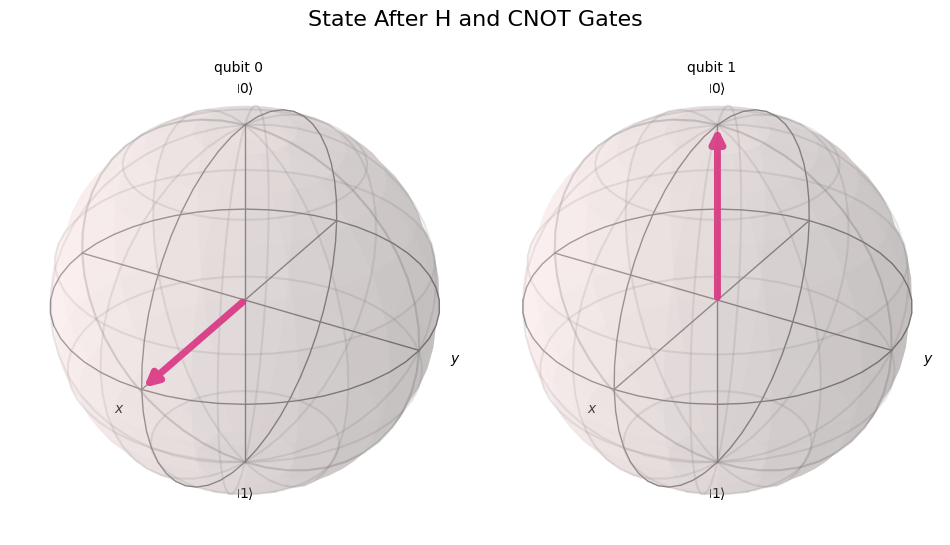

In [57]:
# Visualize the state of the two qubits after applying H and CNOT gates
final_state = Statevector(qc_cnot)
plot_bloch_multivector(final_state, title="State After H and CNOT Gates")

In [52]:
# Draw the circuit
print("Circuit with H and CNOT gates:")
print(qc_cnot.draw())

Circuit with H and CNOT gates:
     ┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘
